<a href="https://colab.research.google.com/github/teja12345678909876/dataanalyst/blob/main/project_dataset__05_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install opendatasets


In [6]:
import opendatasets as od

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('/content/dataset(in).csv', encoding='latin-1')

In [9]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,1/4/2015 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,1/4/2015 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
17409,1/3/2017 19:00,1042,5.0,1.0,81.0,19.0,3,0,0,3
17410,1/3/2017 20:00,541,5.0,1.0,81.0,21.0,4,0,0,3
17411,1/3/2017 21:00,337,5.5,1.5,78.5,24.0,4,0,0,3
17412,1/3/2017 22:00,224,5.5,1.5,76.0,23.0,4,0,0,3


In [10]:
# prompt: find the null values

data.isnull().sum()

,0
timestamp,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


In [11]:
# prompt: 	TASK 02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

data.duplicated().sum()


0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

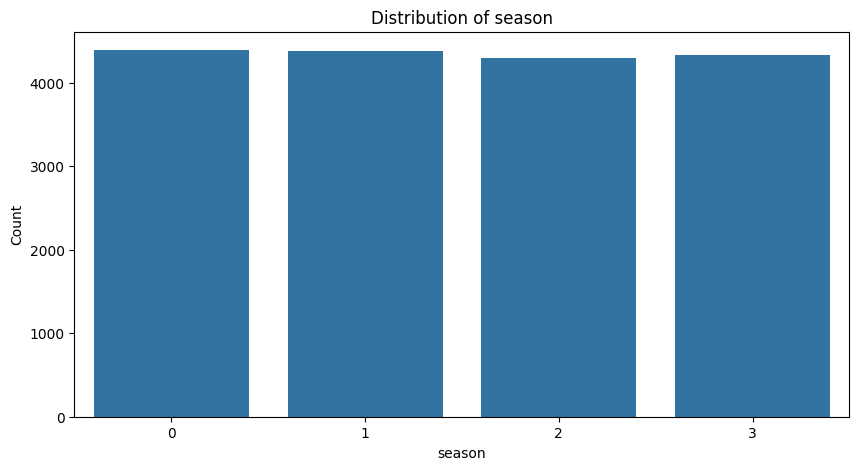

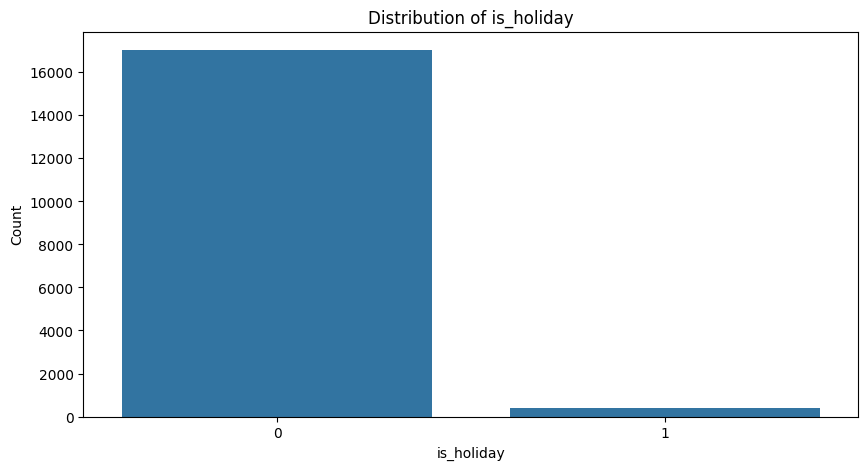

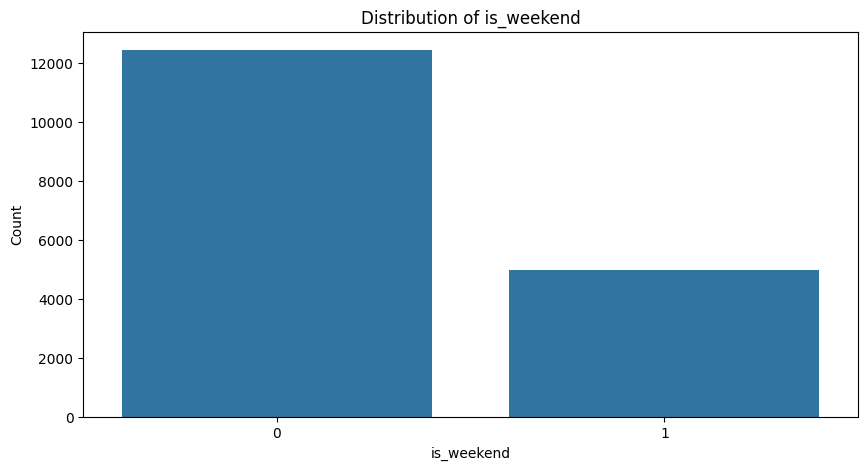

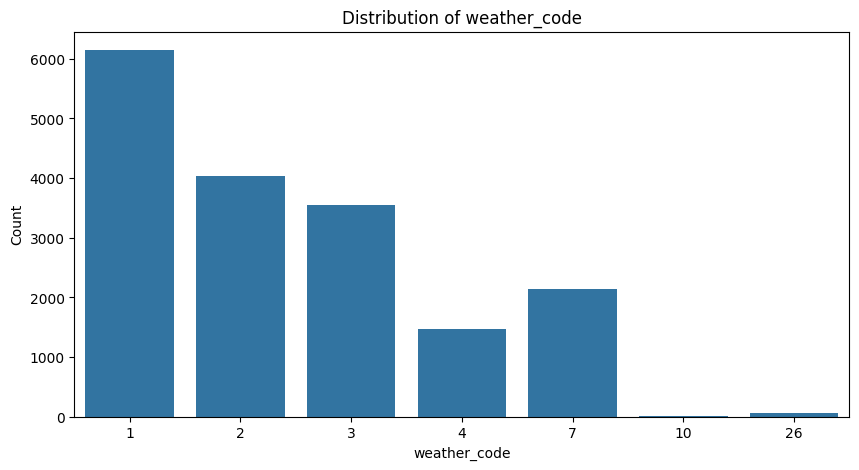

In [13]:
#  PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON season/is_holiday/is_weekend/weather_code


def plot_categorical_features(df, features):
    for feature in features:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=feature, data=df)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

categorical_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']
plot_categorical_features(data, categorical_features)

In [15]:
# prompt:  MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.give me python code  dataset

import pandas as pd

# Assuming 'data' DataFrame is already loaded as shown in the previous code
# Load your data here, if it's not already loaded. For example:
# data = pd.read_csv('your_data_file.csv')

# Convert 'timestamp' column to datetime objects if it's not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract features
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['day_of_month'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Define a function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

data['season'] = data['month'].apply(get_season)

# Display the updated DataFrame with new features
print(data.head())

            timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0             3   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0             1   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0             1   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0             1   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5             1   

   is_holiday  is_weekend  season  day_of_week  day_of_month  hour  month  \
0           0           1  winter            6             4     0      1   
1           0           1  winter            6             4     1      1   
2           0           1  winter            6             4     2      1   
3           0           1  winter            6             4     3      1   
4           0           1  winter            6             4     4      1   

   year  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  


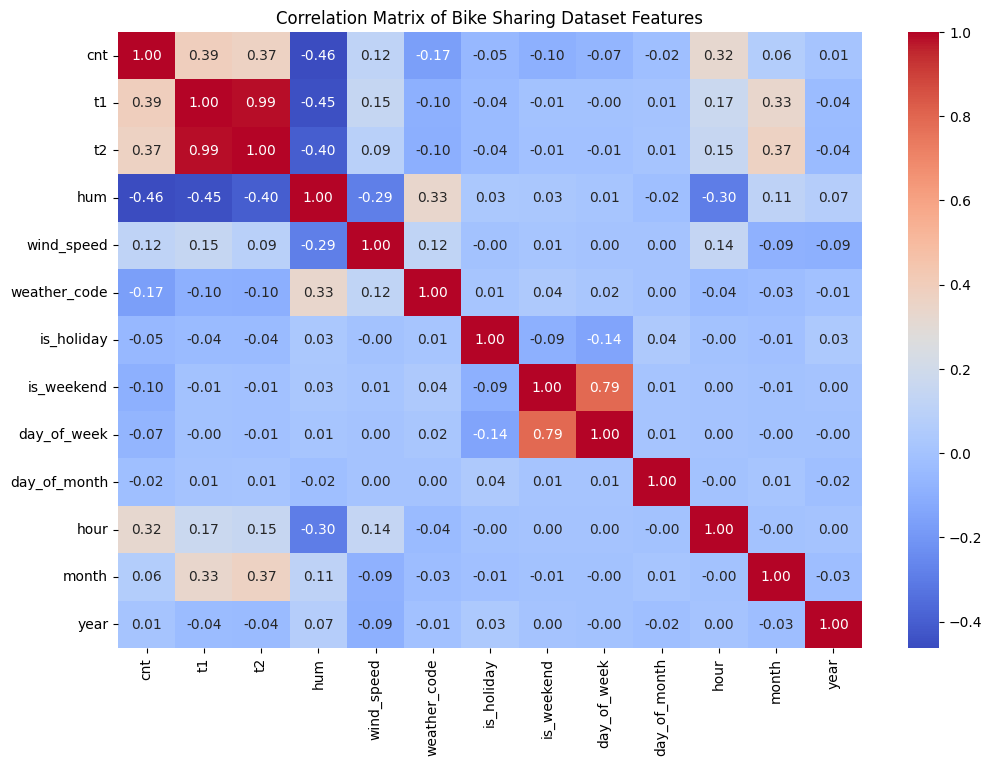

In [17]:
# Calculate the correlation matrix, but only for numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing Dataset Features')
plt.show()

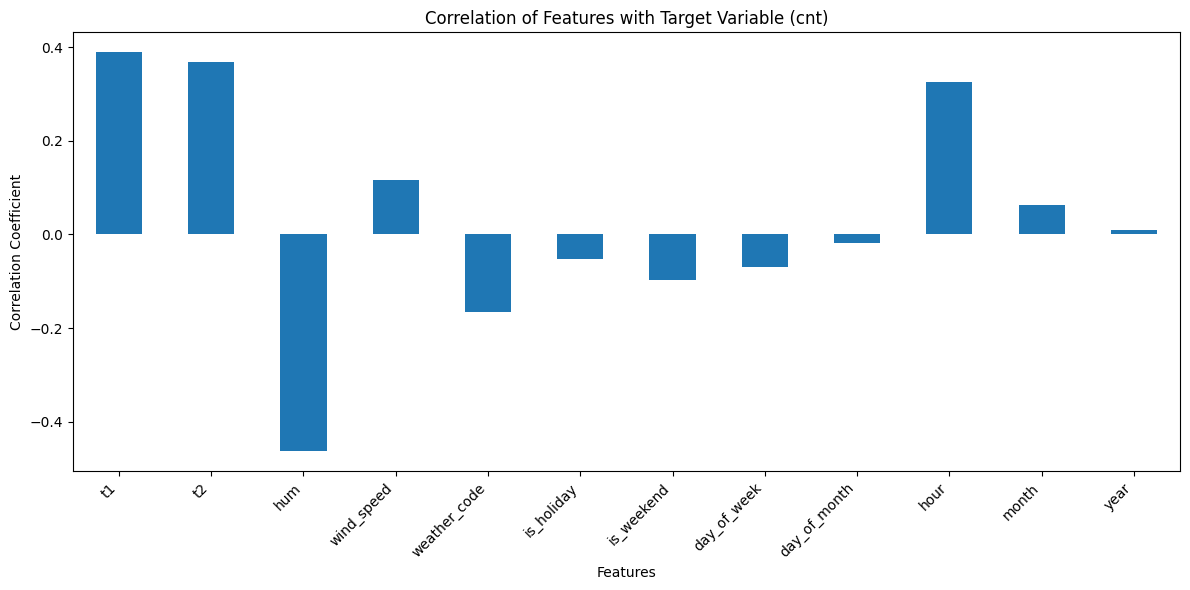

In [19]:
# prompt: VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Calculate the correlation between the target variable ('cnt') and other features.
# Select only numeric columns before calculating correlation
correlation_with_target = data.select_dtypes(include=['number']).corr()['cnt'].drop('cnt')  # Exclude 'cnt' itself

# Create a bar plot to visualize the correlation
plt.figure(figsize=(12, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlation of Features with Target Variable (cnt)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

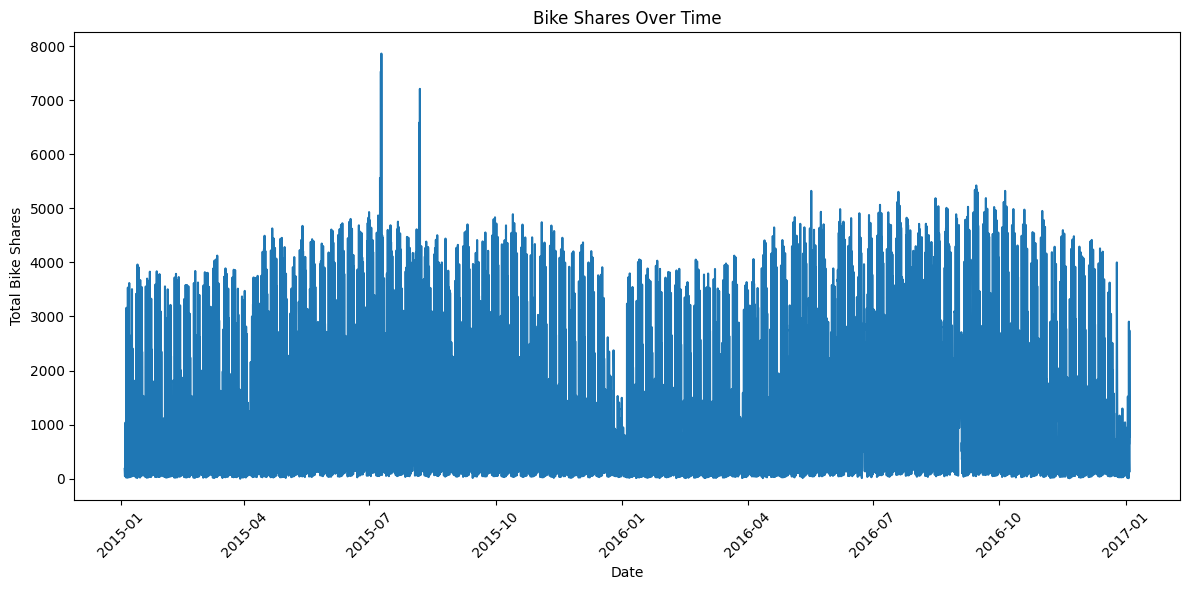

In [20]:
# prompt: PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT


# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.
# Resample the data to get the total count of bike shares per day
daily_bike_shares = data.groupby('timestamp')['cnt'].sum().reset_index()


# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='cnt', data=daily_bike_shares)
plt.title('Bike Shares Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Shares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

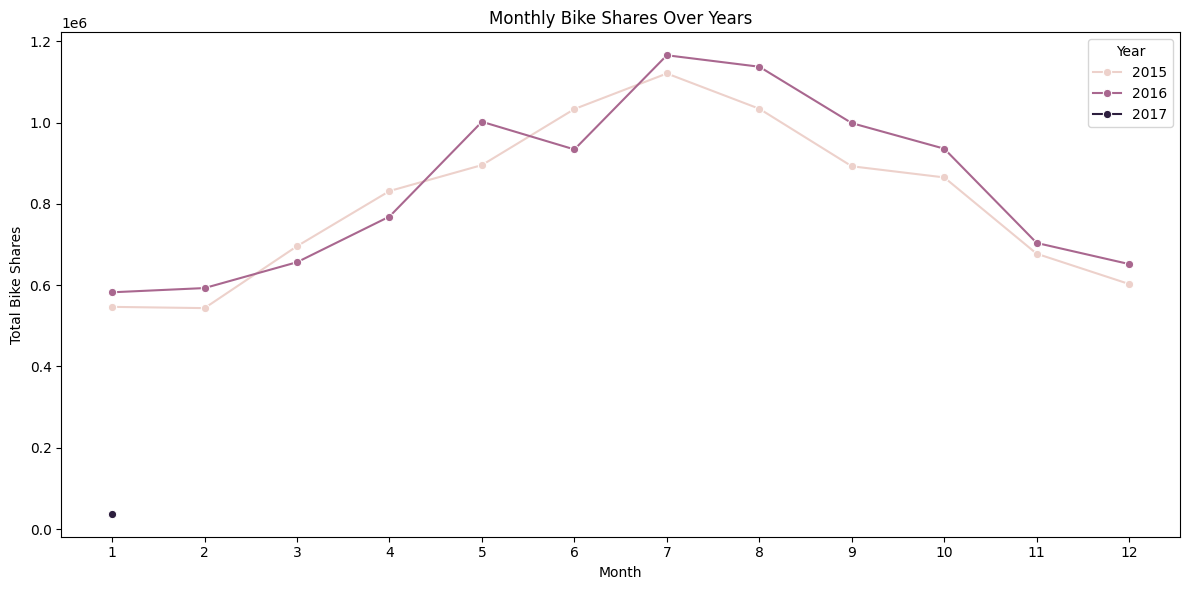

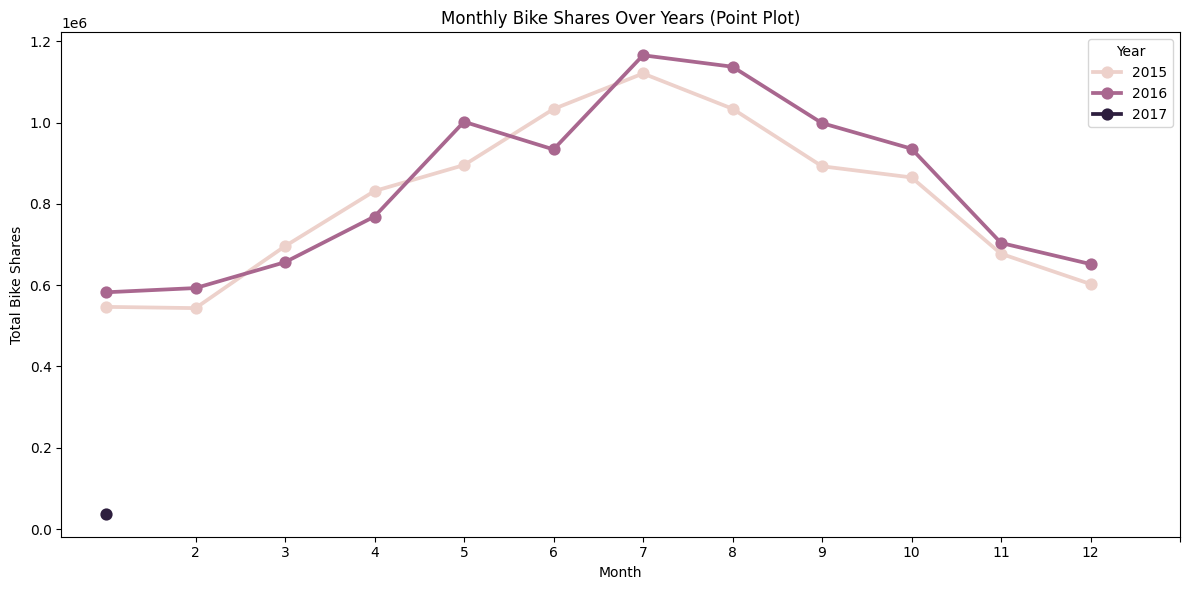

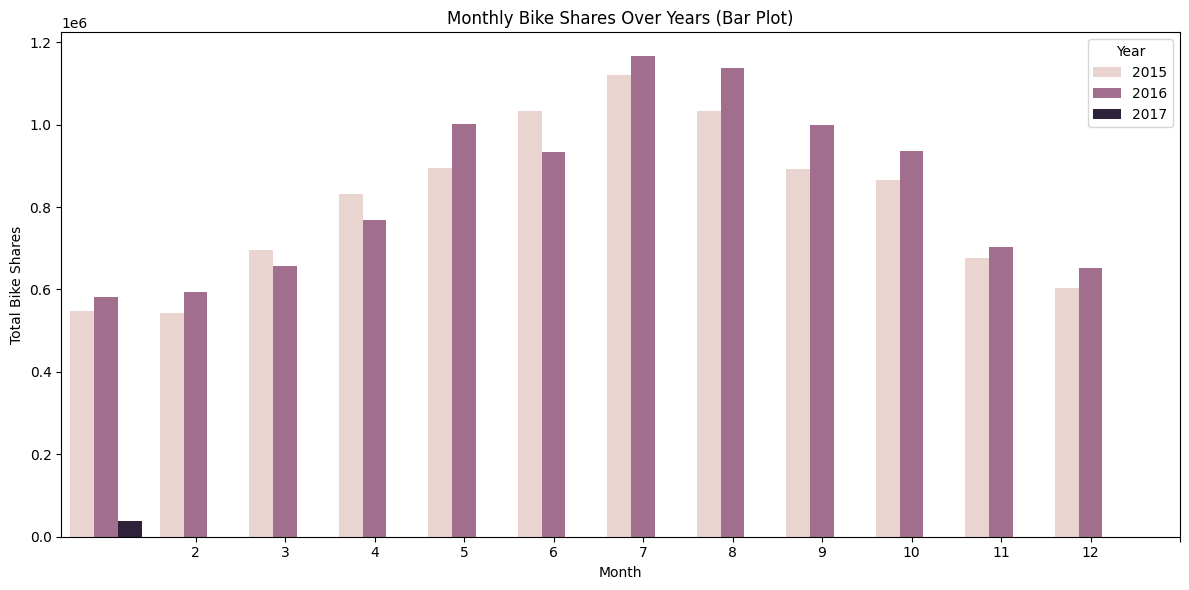

In [21]:
# prompt: PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by month and year, then sum the bike shares ('cnt')
monthly_bike_shares = data.groupby(['month', 'year'])['cnt'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', hue='year', data=monthly_bike_shares, marker='o')  # Add markers
plt.title('Monthly Bike Shares Over Years')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.xticks(range(1, 13)) # Ensure all months are displayed on x-axis
plt.legend(title='Year')
plt.tight_layout()
plt.show()


# Create the point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='cnt', hue='year', data=monthly_bike_shares)
plt.title('Monthly Bike Shares Over Years (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', hue='year', data=monthly_bike_shares)
plt.title('Monthly Bike Shares Over Years (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

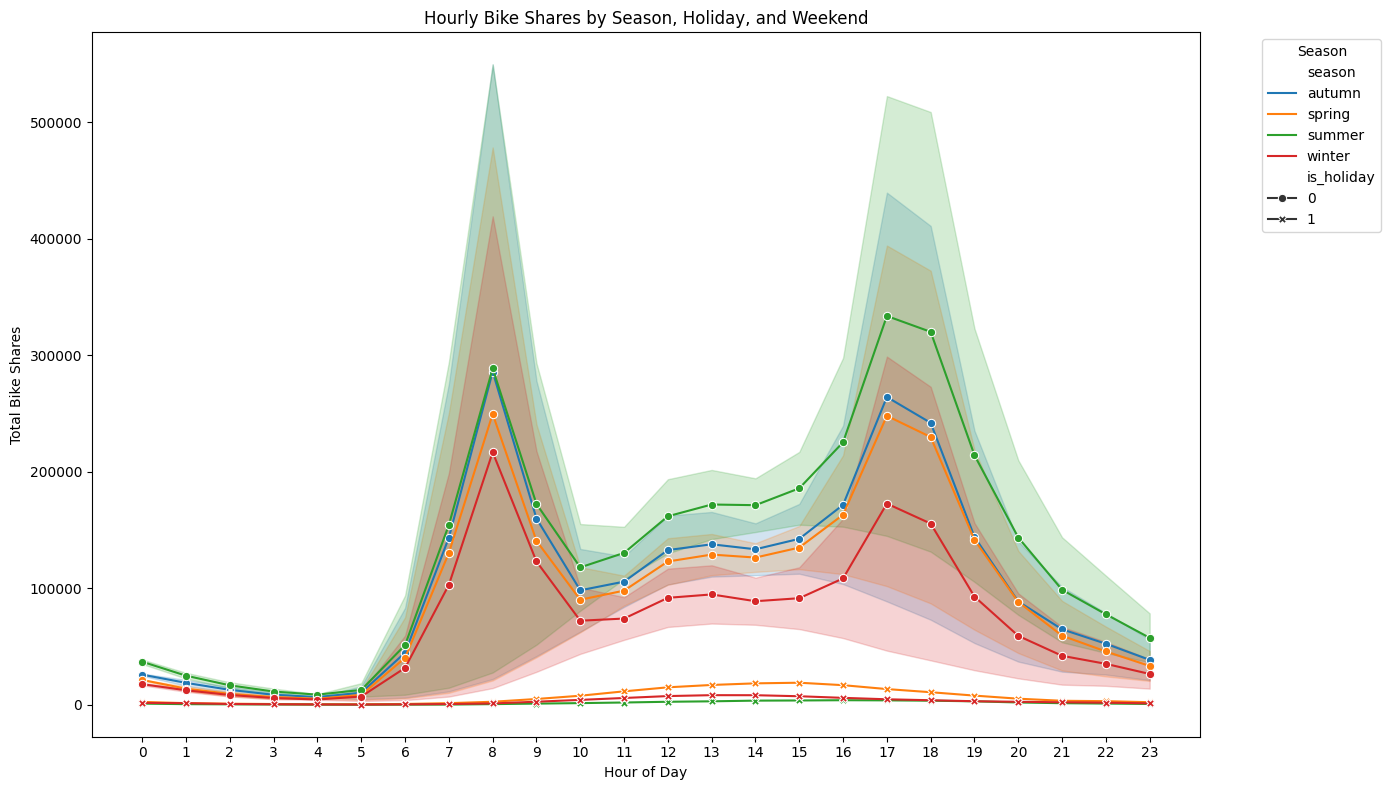

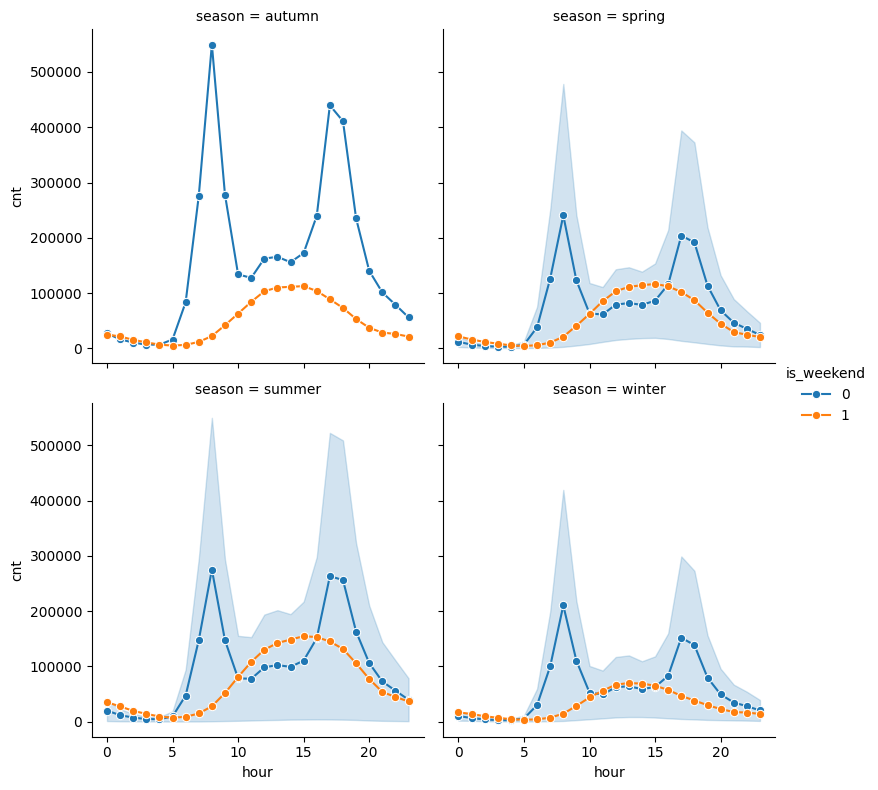

In [22]:
# prompt: PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by hour, season, is_holiday, and is_weekend, then sum the bike shares ('cnt')
hourly_bike_shares = data.groupby(['hour', 'season', 'is_holiday', 'is_weekend'])['cnt'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='cnt', hue='season', style='is_holiday', markers=True, dashes=False, data=hourly_bike_shares)
plt.title('Hourly Bike Shares by Season, Holiday, and Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Bike Shares')
plt.xticks(range(24))
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout()
plt.show()


#Alternative visualization using FacetGrid

g = sns.FacetGrid(hourly_bike_shares, col="season", hue="is_weekend", col_wrap=2, height=4)
g.map(sns.lineplot, "hour", "cnt", marker="o")
g.add_legend()
plt.show()

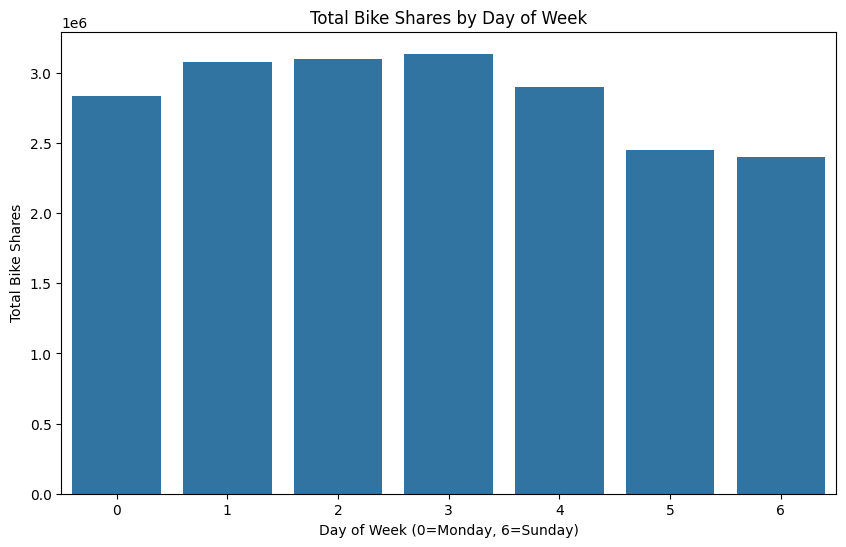

In [23]:
# prompt: PLOTTING BIKE SHARES BY DAY OF WEEK

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by day of the week and sum the bike shares ('cnt')
daily_bike_shares = data.groupby('day_of_week')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=daily_bike_shares)
plt.title('Total Bike Shares by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Bike Shares')
plt.show()

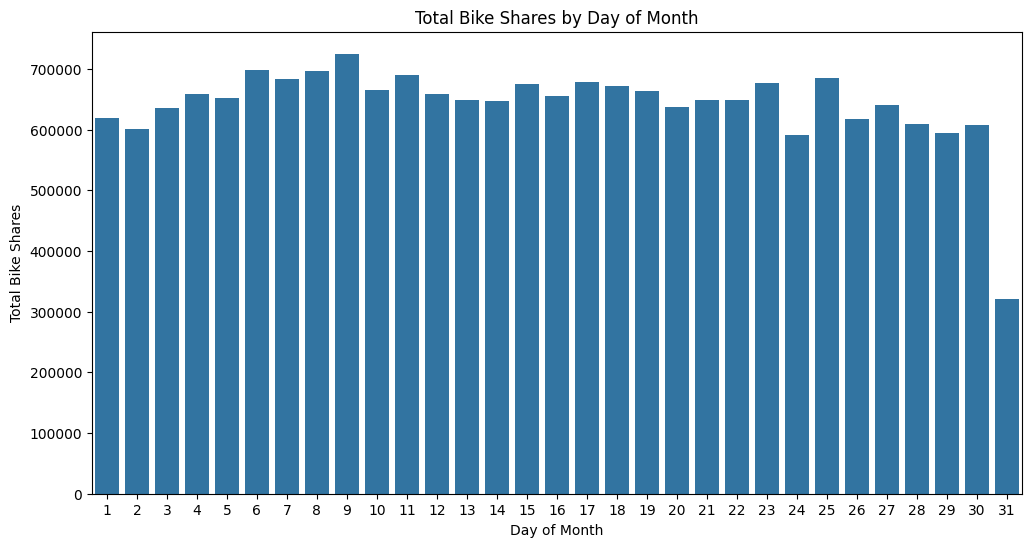

In [24]:
# prompt: PLOTTING BIKE SHARES BY DAY OF MONTH

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by day of the month and sum the bike shares ('cnt')
daily_bike_shares = data.groupby('day_of_month')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_month', y='cnt', data=daily_bike_shares)
plt.title('Total Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Bike Shares')
plt.show()

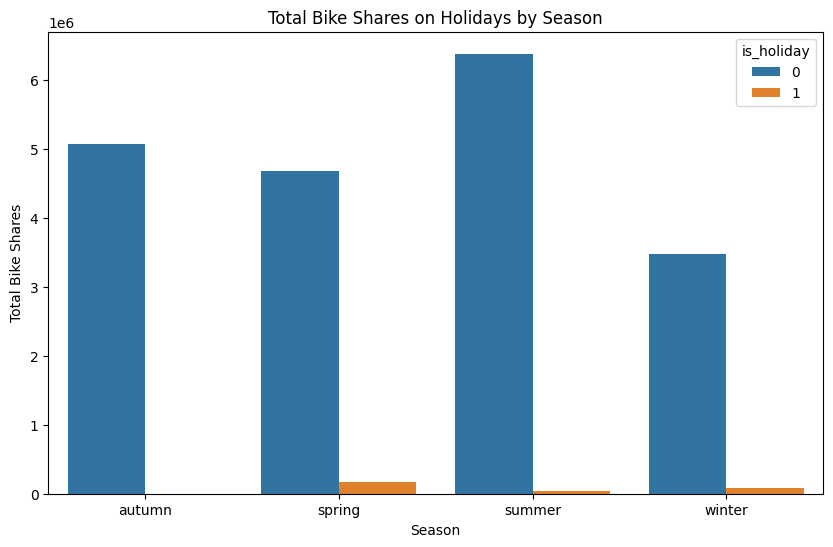

In [25]:
# prompt: PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by 'is_holiday', 'season', and sum the bike shares ('cnt')
holiday_season_bike_shares = data.groupby(['is_holiday', 'season'])['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='is_holiday', data=holiday_season_bike_shares)
plt.title('Total Bike Shares on Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Shares')
plt.show()

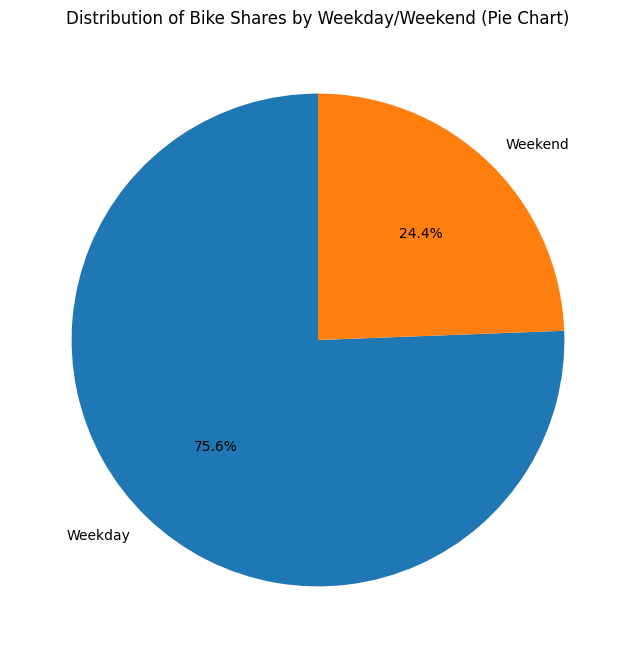

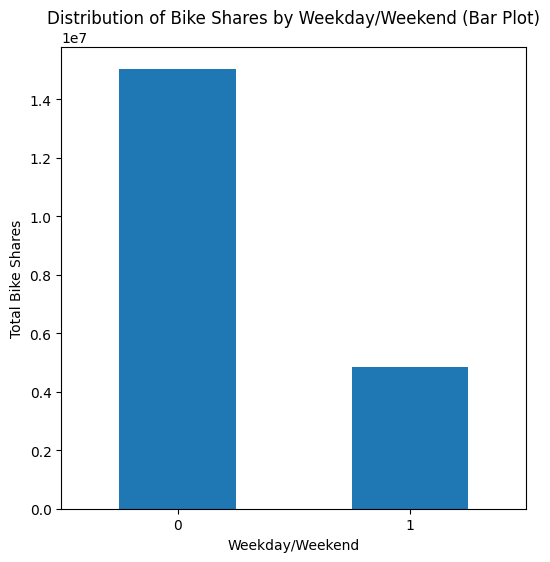

In [26]:
# prompt: VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT



# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by 'is_weekend' and sum the bike shares ('cnt')
weekend_bike_shares = data.groupby('is_weekend')['cnt'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekend_bike_shares, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend (Pie Chart)')
plt.show()

# Create a bar plot
plt.figure(figsize=(6, 6))
weekend_bike_shares.plot(kind='bar')
plt.title('Distribution of Bike Shares by Weekday/Weekend (Bar Plot)')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Total Bike Shares')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

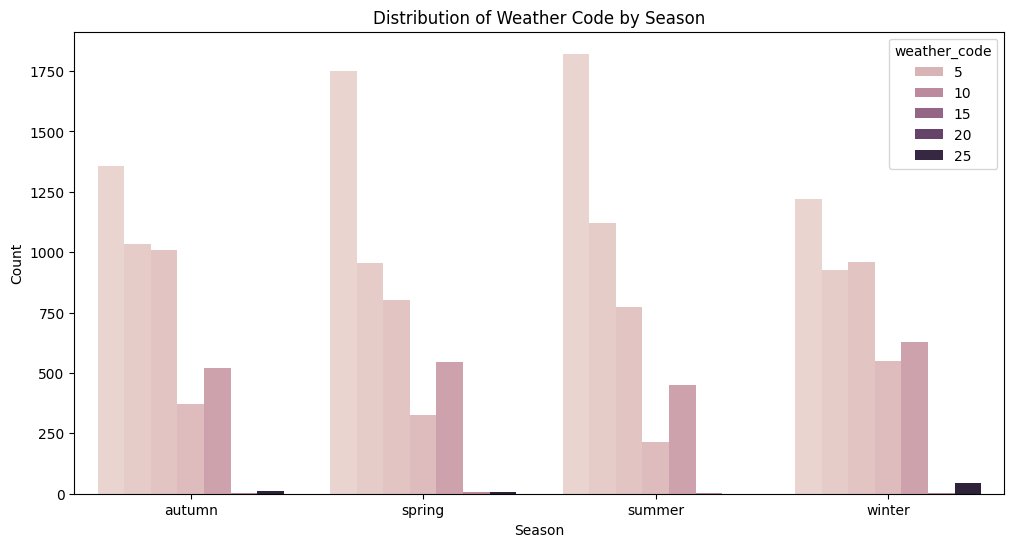

In [27]:
# prompt: PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by 'season' and 'weather_code', then count the occurrences
weather_season_counts = data.groupby(['season', 'weather_code']).size().reset_index(name='counts')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='counts', hue='weather_code', data=weather_season_counts)
plt.title('Distribution of Weather Code by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()